<a href="https://colab.research.google.com/github/alexapruiz/Projetos/blob/master/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando os dados

In [22]:
#Importando as bibliotecas para manipulação dos dados e geração de gráficos
import pandas as pd
import matplotlib.pyplot as plt

#Importando as bibliotecas de Machine Learning
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
#Atribuindo nomes às colunas
colunas = ['id','idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo','coracao']

#Abrindo o arquivo do Kaggle
cardio = pd.read_csv('cardio_train.csv', sep=';',names=colunas,header=0)

In [44]:
#Definindo os DataFrames de dados e o 'alvo'
x = cardio[colunas]
y = cardio['coracao']

# Explorando os dados

In [25]:
#Verificando o formato do DataFrame (linhas,colunas)
cardio.shape

(70000, 13)

In [26]:
#Iniciando a análise exploratória
cardio.head()

,id,idade,genero,altura,peso,pressao_max,pressao_min,colesterol,diabetes,fuma,bebe,ativo,coracao
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
#Consultando quantos registros indicam a presença / ausência de doença cardiovascular (0: Não possui doença / 1: Possui doença)
cardio.groupby('coracao').size()

coracao
0    35021
1    34979
dtype: int64

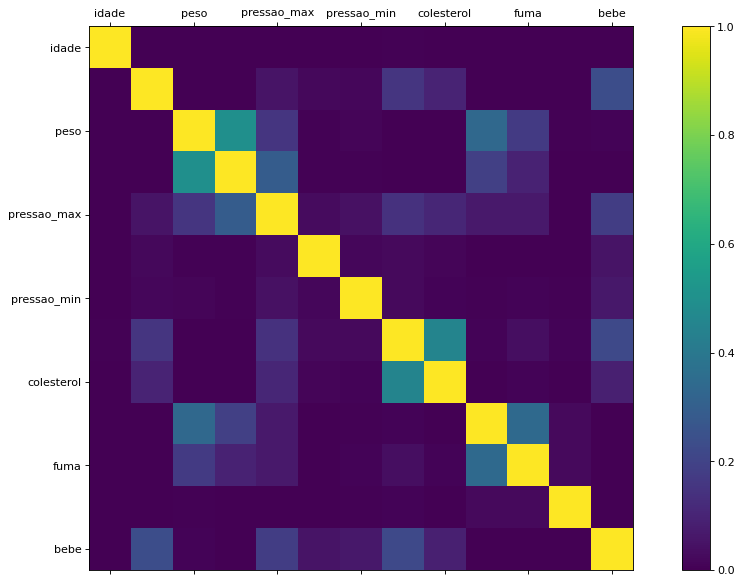

In [116]:
#Verificando a correlação entre os atributos
correlacao = cardio.corr()

#Criando um gráfico para exibir a correlação
fig = plt.figure(figsize=(16,9), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = 0, vmax = 1)
fig.colorbar(cax)

#Considerando apenas os 'atributos principais'
ax.set_xticklabels(['id','idade','peso','pressao_max','pressao_min','colesterol','fuma','bebe'])
ax.set_yticklabels(['id','idade','peso','pressao_max','pressao_min','colesterol','fuma','bebe'])
plt.show()

# Normalizando os dados

In [115]:
#Criando um novo DataFrame com os dados normalizados
cardio2 = cardio.copy()

#Transformando a coluna idade em (anos)
cardio2['idade'] = cardio2['idade'] / 365

#Eliminando registros incoerentes (outliers)
cardio2 = cardio2[(cardio2['pressao_min'] > 40) & (cardio2['pressao_max'] > 70) & (cardio2['peso'] > 40)]
cardio2.shape

(69633, 13)

# Selecionando as melhores variáveis

In [119]:
#Selecionando as melhores features usando o método Chi2 (qui-quadrado)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']
array = cardio2[colunas].values

# Separando o array em componentes de input e output
X = array[:,0:-1]
Y = array[:,-1]

# Extração de Variáveis
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X, Y)

# Sumarizando o score
#print(fit.scores_)
features = fit.transform(X)
cols = fit.get_support(indices=True)
cardio2.iloc[:,cols].head()

,altura,pressao_max,diabetes,fuma
0,168,110,1,0
1,156,140,1,0
2,165,130,1,0
3,169,150,1,0
4,156,100,1,0


In [120]:
#Selecionando as melhores features usando o método f_classif do SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,Y)
features = fit.transform(X)

features
cols = fit.get_support(indices=True)
cardio2.iloc[:,cols].head()

,id,altura,diabetes,fuma
0,0,168,1,0
1,1,156,1,0
2,2,165,1,0
3,3,169,1,0
4,4,156,1,0


In [123]:
# Selecionando as melhores features usando o método RFE (Recursive Feature Elimination)
# Não é recomendado para grandes bases de dados

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']
array = cardio2[colunas].values

# Separando o array em componentes de input e output
X = array[:,0:-1]
Y = array[:,-1]

model = LogisticRegression(max_iter=2000)
rfe = RFE(model,4)
fit = rfe.fit(X, Y)
print('Número de features: {}'.format(fit.n_features_))

cols = fit.get_support(indices=True)
cardio2.iloc[:,cols].head()

Número de features: 4


,pressao_min,colesterol,diabetes,fuma
0,80,1,1,0
1,90,3,1,0
2,70,3,1,0
3,100,1,1,0
4,60,1,1,0


In [124]:
#Selecionando as melhores features usando: Feature Importance
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']
array = cardio2[colunas].values

# Separando o array em componentes de input e output
X = array[:,0:]
Y = array[:,-1]

modelo = RandomForestClassifier(n_estimators=10)
modelo.fit(X, Y)
print(modelo.feature_importances_)
colunas = ['idade','genero','altura','peso','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']

feature_importance = pd.DataFrame(modelo.feature_importances_, index=colunas, columns=['importance']).sort_values('importance', ascending=False)
feature_importance

[9.95997890e-04 1.15699316e-04 6.41414954e-04 7.31819362e-04
 3.36113377e-04 2.71712313e-04 8.69356104e-05 7.70355643e-05
 3.57230138e-04 1.91523065e-04 9.96194518e-01]


,importance
ativo,0.996195
idade,0.000996
peso,0.000732
altura,0.000641
fuma,0.000357
pressao_max,0.000336
pressao_min,0.000272
bebe,0.000192
genero,0.000116
colesterol,0.000087


# **As melhores features foram:**

**Chi2**: altura,pressao_max,diabetes,fuma

**SelectKBest**: altura,diabetes,fuma

**RFE:** pressao_min,colesterol,diabetes,fuma

**Feature Importance:** ativo, idade, peso

* Percebi que as features 'diabetes' e 'fuma' se repete mais, seguido por 'pressao' (max ou min). Curiosamente a feature 'altura' aparece com uma das mais importantes em dois métodos (Chi2 e SelectKBest)

# Criando um modelo de regressão linear

In [139]:
#Criando as variáveis de treino e teste (x e y)
x = cardio2[['id','idade','genero','peso','altura','pressao_max','pressao_min','colesterol','diabetes','fuma','bebe','ativo']]
y = cardio2['coracao']

#Separando os dados de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.3,random_state=20)

In [138]:
#
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [143]:
#Calculando a acurácia do modelo
print('Acurácia com Regressão Linear: ' + str(accuracy_score(teste_y,previsoes) * 100))

Acurácia com Regressão Linear: 58.784107228338925


# Criando um modelo com 'RandomForestClassifier'

In [145]:
#Importando as bibliotecas de Machine Learning
from sklearn.ensemble import RandomForestClassifier

In [146]:
x['IMC'] = (x['peso'] / ((x['altura'] / 100) ** 2))

In [148]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.3,random_state=20)

In [149]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=10)
modelo.fit(treino_x, treino_y)
p = modelo.predict(teste_x)

In [151]:
#72.3204081632653 (test_size=0.7,random_state=20)
acc = np.mean(teste_y == p) * 100
print('Acurácia com RandomForestClassifier: ' + str(acc))

Acurácia com RandomForestClassifier: 72.94877932024892


# Validação Cruzada (RepeatedKFold) com RandomForestClassifier

In [152]:
#Importando as bibliotecas de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [155]:
#Usando uma técnica de reamostragem -> Validação Cruzada
resultados = []
kf = RepeatedKFold(n_splits=4, n_repeats=15, random_state=10)

for linhas_treino, linhas_valid in kf.split(x):
  X_treino , X_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
  y_treino , y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  modelo.fit(X_treino, y_treino)
  p = modelo.predict(X_valid)
  acc = np.mean(y_valid == p)
  resultados.append(acc)
  print('Acc: ',acc)  

Acc:  0.7246251938652422
Acc:  0.7278262867647058
Acc:  0.716796875
Acc:  0.724609375
Acc:  0.7252570509506577
Acc:  0.7230583639705882
Acc:  0.7223690257352942
Acc:  0.7244944852941176
Acc:  0.7245103107588029
Acc:  0.7243221507352942
Acc:  0.7198414522058824
Acc:  0.7258731617647058
Acc:  0.7275547130794416
Acc:  0.7251263786764706
Acc:  0.7206456801470589
Acc:  0.7252412683823529
Acc:  0.726635648227928
Acc:  0.7270795036764706
Acc:  0.7184627757352942
Acc:  0.7239774816176471
Acc:  0.7258314664828537
Acc:  0.7250689338235294
Acc:  0.7282284007352942
Acc:  0.7240923713235294
Acc:  0.7243379860991441
Acc:  0.7181755514705882
Acc:  0.7199563419117647
Acc:  0.7282284007352942
Acc:  0.7231317134815325
Acc:  0.7243221507352942
Acc:  0.7204159007352942
Acc:  0.7265625
Acc:  0.7206042851398702
Acc:  0.7238051470588235
Acc:  0.7209329044117647
Acc:  0.7271369485294118
Acc:  0.7250272847377793
Acc:  0.7228285845588235
Acc:  0.7260454963235294
Acc:  0.7202435661764706
Acc:  0.7285886610373945

In [156]:
#Verificando a média das acurácias, geral uma média geral
print(np.mean(resultados) * 100)

72.41058961123402


# XGBoost

In [295]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Separando os dados
colunas = ['id','idade','genero','altura','peso','pressao_min','pressao_max','colesterol','diabetes','fuma','bebe','ativo']
X = cardio2[colunas]
Y = cardio2['coracao']

# Dividindo os conjuntos de treino e teste
train_X, test_X, train_y, test_y = train_test_split(X.values, Y.values, test_size=0.2)

# Corrigindo valores ausentes
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

# Instanciando o modelo XGBoost
model = XGBRegressor()

# Executando o 'fit' para o modelo XGBoost
model.fit(train_X, train_y, verbose=False)

# Fazendo as previsões
predictions = model.predict(test_X)

# Imprimindo o erro médio das previsões
print('Erro Médio Absoluto: {:.2f}'.format(mean_absolute_error(predictions, test_y)))
print('Acurácia: ' + str(100 - (mean_absolute_error(predictions, test_y) * 100)))

[20:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Erro Médio Absoluto: 0.36
Acurácia: 64.02318382897448
